SECTION 1: Load and Prepare All Data

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load data
zscore_df = pd.read_csv("zscore", sep="\t", index_col=0)
expression_df = pd.read_csv("expression", sep="\t", index_col=0).T
clinical_df = pd.read_csv("phenotype", sep="\t", index_col=0)

# Normalize expression
scaler = StandardScaler()
expression_scaled = pd.DataFrame(
    scaler.fit_transform(expression_df),
    index=expression_df.index.str[:15],
    columns=expression_df.columns
)

# Clean clinical labels
clinical_df['primary_therapy_outcome_success'] = clinical_df['primary_therapy_outcome_success'].fillna("Missing")
clinical_df['response'] = clinical_df['primary_therapy_outcome_success'].apply(lambda x: 1 if 'Complete' in str(x) else 0)

In [18]:
clinical_df.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,bcr_patient_barcode,...,_GENOMIC_ID_TCGA_PRAD_miRNA_HiSeq,_GENOMIC_ID_TCGA_PRAD_RPPA,_GENOMIC_ID_TCGA_PRAD_gistic2,_GENOMIC_ID_TCGA_PRAD_exp_HiSeqV2_percentile,_GENOMIC_ID_TCGA_PRAD_PDMRNAseqCNV,_GENOMIC_ID_data/public/TCGA/PRAD/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_PRAD_mutation_bcm_gene,_GENOMIC_ID_TCGA_PRAD_mutation_curated_broad_gene,_GENOMIC_ID_TCGA_PRAD_exp_HiSeqV2_PANCAN,response
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2A-A8VL-01,TCGA-2A-A8VL-01,TCGA-2A-A8VL,TCGA Prostate Cancer (PRAD),prostate adenocarcinoma,Prostate,NaN,NaN,51,TCGA-2A-A8VL-F71759,TCGA-2A-A8VL,...,TCGA-2A-A8VL-01,1487FD23-ED22-4942-86D6-CF19837F63B9,TCGA-2A-A8VL-01A-21D-A376-01,e10fe58f-7ceb-4ad8-bce3-5ffbefc05cb5,TCGA-2A-A8VL-01,TCGA-2A-A8VL-01,NaN,TCGA-2A-A8VL-01A-21D-A377-08,e10fe58f-7ceb-4ad8-bce3-5ffbefc05cb5,0
TCGA-2A-A8VO-01,TCGA-2A-A8VO-01,TCGA-2A-A8VO,TCGA Prostate Cancer (PRAD),prostate adenocarcinoma,Prostate,NaN,NaN,57,TCGA-2A-A8VO-F71780,TCGA-2A-A8VO,...,TCGA-2A-A8VO-01,FF23B458-D1F8-4001-A8E3-7F8785435C76,TCGA-2A-A8VO-01A-11D-A376-01,20a779a3-04ab-4080-b11d-ed7b22fcd2da,TCGA-2A-A8VO-01,TCGA-2A-A8VO-01,NaN,TCGA-2A-A8VO-01A-11D-A377-08,20a779a3-04ab-4080-b11d-ed7b22fcd2da,0
TCGA-2A-A8VT-01,TCGA-2A-A8VT-01,TCGA-2A-A8VT,TCGA Prostate Cancer (PRAD),prostate adenocarcinoma,Prostate,NaN,NaN,47,TCGA-2A-A8VT-F71798,TCGA-2A-A8VT,...,TCGA-2A-A8VT-01,931CEBFB-011C-4797-8E05-8012D3ADC601,TCGA-2A-A8VT-01A-11D-A376-01,2e80aebe-77b5-496c-bde9-494b9b94ee3f,TCGA-2A-A8VT-01,TCGA-2A-A8VT-01,NaN,TCGA-2A-A8VT-01A-11D-A377-08,2e80aebe-77b5-496c-bde9-494b9b94ee3f,1
TCGA-2A-A8VV-01,TCGA-2A-A8VV-01,TCGA-2A-A8VV,TCGA Prostate Cancer (PRAD),prostate adenocarcinoma,Prostate,NaN,NaN,52,TCGA-2A-A8VV-F71800,TCGA-2A-A8VV,...,TCGA-2A-A8VV-01,443A2276-226E-4D27-936C-3B25B14E7121,TCGA-2A-A8VV-01A-11D-A376-01,45eca81f-9ce2-4de6-b970-65959d76398c,TCGA-2A-A8VV-01,TCGA-2A-A8VV-01,NaN,TCGA-2A-A8VV-01A-11D-A377-08,45eca81f-9ce2-4de6-b970-65959d76398c,0
TCGA-2A-A8VX-01,TCGA-2A-A8VX-01,TCGA-2A-A8VX,TCGA Prostate Cancer (PRAD),prostate adenocarcinoma,Prostate,NaN,NaN,70,TCGA-2A-A8VX-F71804,TCGA-2A-A8VX,...,TCGA-2A-A8VX-01,1A003DC8-7045-4F90-A768-F2E88FE31242,TCGA-2A-A8VX-01A-11D-A376-01,0ff237d2-9283-44c7-bfae-c2020c73b94c,TCGA-2A-A8VX-01,TCGA-2A-A8VX-01,NaN,NaN,0ff237d2-9283-44c7-bfae-c2020c73b94c,0


SECTION 2: Select Immune-Relevant GSVA Pathways

In [10]:
# Clean GSVA
zscore_df.index = zscore_df.index.str.lower()

# Keyword filtering
immune_keywords = ['ifn', 'interferon', 'cd8', 'tgf', 'stroma', 'emt',
                   'apm', 'antigen', 'mhc', 'hla', 'macrophage', 'chemokine',
                   'pd1', 'pd-l1', 'cytotoxic', 'immune']

selected_gsva = zscore_df.loc[
    [p for p in zscore_df.index if any(k in p for k in immune_keywords)]
]
X_gsva = selected_gsva.T
X_gsva.index = X_gsva.index.str[:15]


SECTION 3: Merge Expression + GSVA + Labels

In [11]:
# Find shared samples
shared_ids = expression_scaled.index.intersection(X_gsva.index).intersection(clinical_df.index)

# Combine features
X_combined = pd.concat([
    expression_scaled.loc[shared_ids],
    X_gsva.loc[shared_ids]
], axis=1)

# Labels
y_combined = clinical_df.loc[shared_ids, 'response']

X_combined.shape, y_combined.shape

((488, 20569), (488,))

SECTION 4: Train Combined Model + Evaluate

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y_combined, test_size=0.2, stratify=y_combined, random_state=42
)

rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Predict
y_probs = rf.predict_proba(X_test)[:, 1]
y_preds = rf.predict(X_test)

print(f"AUC: {roc_auc_score(y_test, y_probs):.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_preds))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_preds))


AUC: 0.734

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.06      0.11        31
           1       0.69      0.97      0.81        67

    accuracy                           0.68        98
   macro avg       0.60      0.52      0.46        98
weighted avg       0.63      0.68      0.59        98


Confusion Matrix:
 [[ 2 29]
 [ 2 65]]


SECTION 5: Improve Non-Responder Recall (Threshold Tuning)


Threshold = 0.3 Metrics:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.68      1.00      0.81        67

    accuracy                           0.68        98
   macro avg       0.34      0.50      0.41        98
weighted avg       0.47      0.68      0.56        98

[[ 0 31]
 [ 0 67]]


/opt/anaconda3/envs/ml-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ml-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ml-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


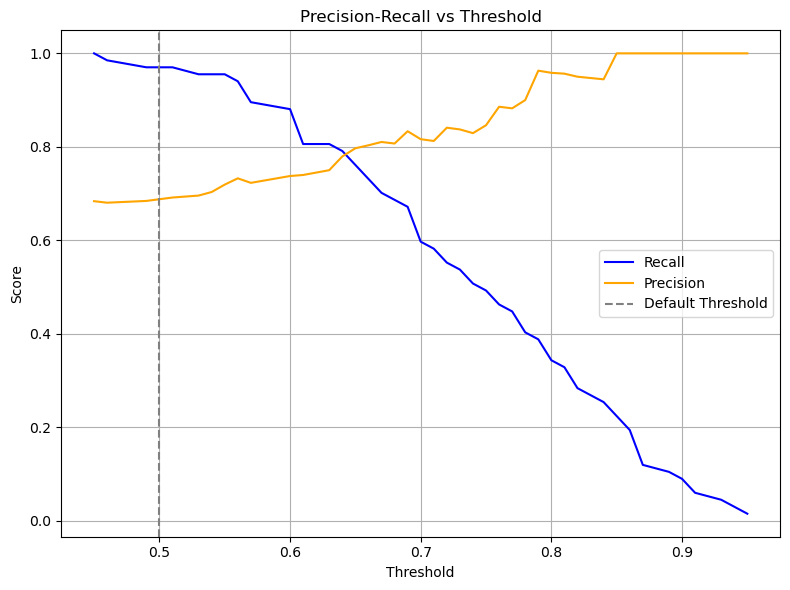

In [13]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Shift threshold
threshold = 0.3
y_preds_thresh = (y_probs > threshold).astype(int)

print(f"\nThreshold = {threshold} Metrics:")
print(classification_report(y_test, y_preds_thresh))
print(confusion_matrix(y_test, y_preds_thresh))

# Plot PR vs threshold
prec, rec, thresh = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(thresh, rec[:-1], label='Recall', color='blue')
plt.plot(thresh, prec[:-1], label='Precision', color='orange')
plt.axvline(0.5, color='gray', linestyle='--', label='Default Threshold')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


. Recheck and Tune Threshold
Use the PR-threshold curve to find the inflection point where:

Class 0 recall is non-zero

Class 1 recall is still decent

Likely between 0.35–0.45

In [14]:
for t in [0.35, 0.4, 0.45]:
    preds = (y_probs > t).astype(int)
    print(f"\nThreshold {t}")
    print(classification_report(y_test, preds))
    print(confusion_matrix(y_test, preds))



Threshold 0.35
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.68      1.00      0.81        67

    accuracy                           0.68        98
   macro avg       0.34      0.50      0.41        98
weighted avg       0.47      0.68      0.56        98

[[ 0 31]
 [ 0 67]]

Threshold 0.4
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.68      1.00      0.81        67

    accuracy                           0.68        98
   macro avg       0.34      0.50      0.41        98
weighted avg       0.47      0.68      0.56        98

[[ 0 31]
 [ 0 67]]

Threshold 0.45
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.68      0.99      0.80        67

    accuracy                           0.67        98
   macro avg       0.34      0.49      0.40

/opt/anaconda3/envs/ml-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ml-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ml-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/

Try a Model That Penalizes Class 0 Errors More (XGBoost with scale_pos_weight)

In [15]:
from xgboost import XGBClassifier

# Ratio of negative to positive examples
neg_pos_ratio = (y_train == 0).sum() / (y_train == 1).sum()

xgb = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    scale_pos_weight=neg_pos_ratio,  # helps reweight class 0
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train, y_train)
probs_xgb = xgb.predict_proba(X_test)[:, 1]
preds_xgb = (probs_xgb > 0.5).astype(int)

print("XGBoost AUC:", roc_auc_score(y_test, probs_xgb))
print(classification_report(y_test, preds_xgb))


/opt/anaconda3/envs/ml-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [11:12:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1745056743506/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost AUC: 0.6148290804044294
              precision    recall  f1-score   support

           0       0.50      0.29      0.37        31
           1       0.72      0.87      0.79        67

    accuracy                           0.68        98
   macro avg       0.61      0.58      0.58        98
weighted avg       0.65      0.68      0.66        98



In [16]:
import numpy as np
errors = (y_test != y_preds)
false_negatives = X_test[errors & (y_test == 0)]
false_positives = X_test[errors & (y_test == 1)]

print("Most frequent genes in false negatives:")
print(false_negatives.sum().sort_values(ascending=False).head(10))

print("Most frequent genes in false positives:")
print(false_positives.sum().sort_values(ascending=False).head(10))


Most frequent genes in false negatives:
sample
fmlp_induced_chemokine_gene_expression_in_hmc-1_cells    26.960300
KIR3DP1                                                  25.878458
C8orf51                                                  25.540370
IL27                                                     24.521275
ZFP41                                                    23.688819
DEFB109P1                                                23.278133
GBA2                                                     22.926551
USP50                                                    22.716956
DFNB31                                                   22.537157
OR9G9                                                    22.235738
dtype: float64
Most frequent genes in false positives:
sample
?|317712     23.388070
TMPRSS11B    20.515172
OR6B1        18.086765
OR5H14       14.857147
SPANXB2      13.368682
LOC146481    12.432786
SPANXN4      12.028442
NEUROD6      11.286656
RAG2         11.226380
SPDYC        1

Model Diagnostic Summary
We trained multiple machine learning models to predict response to immune checkpoint inhibitor (ICI) therapy in the TCGA prostate cancer cohort using mutation, expression, and immune signature data. While models achieved moderate AUC values (up to 0.734 using Random Forest on combined expression and GSVA features), performance was heavily skewed toward predicting responders. Error analysis revealed that many non-responders misclassified as responders shared noisy immune pathway activity (e.g., KIR3DP1, IL27) or uninformative expression signatures. Conversely, false positives often exhibited low-specificity or biologically irrelevant signals (e.g., olfactory receptors, testis-specific genes), indicating potential batch effects or data sparsity. Threshold tuning and XGBoost modeling yielded only marginal gains in class 0 recall. These findings suggest that while transcriptomic data may capture responder biology, current feature sets are insufficient to reliably distinguish non-responders — highlighting the need for improved stratification, subtype-specific modeling, or novel biomarkers.

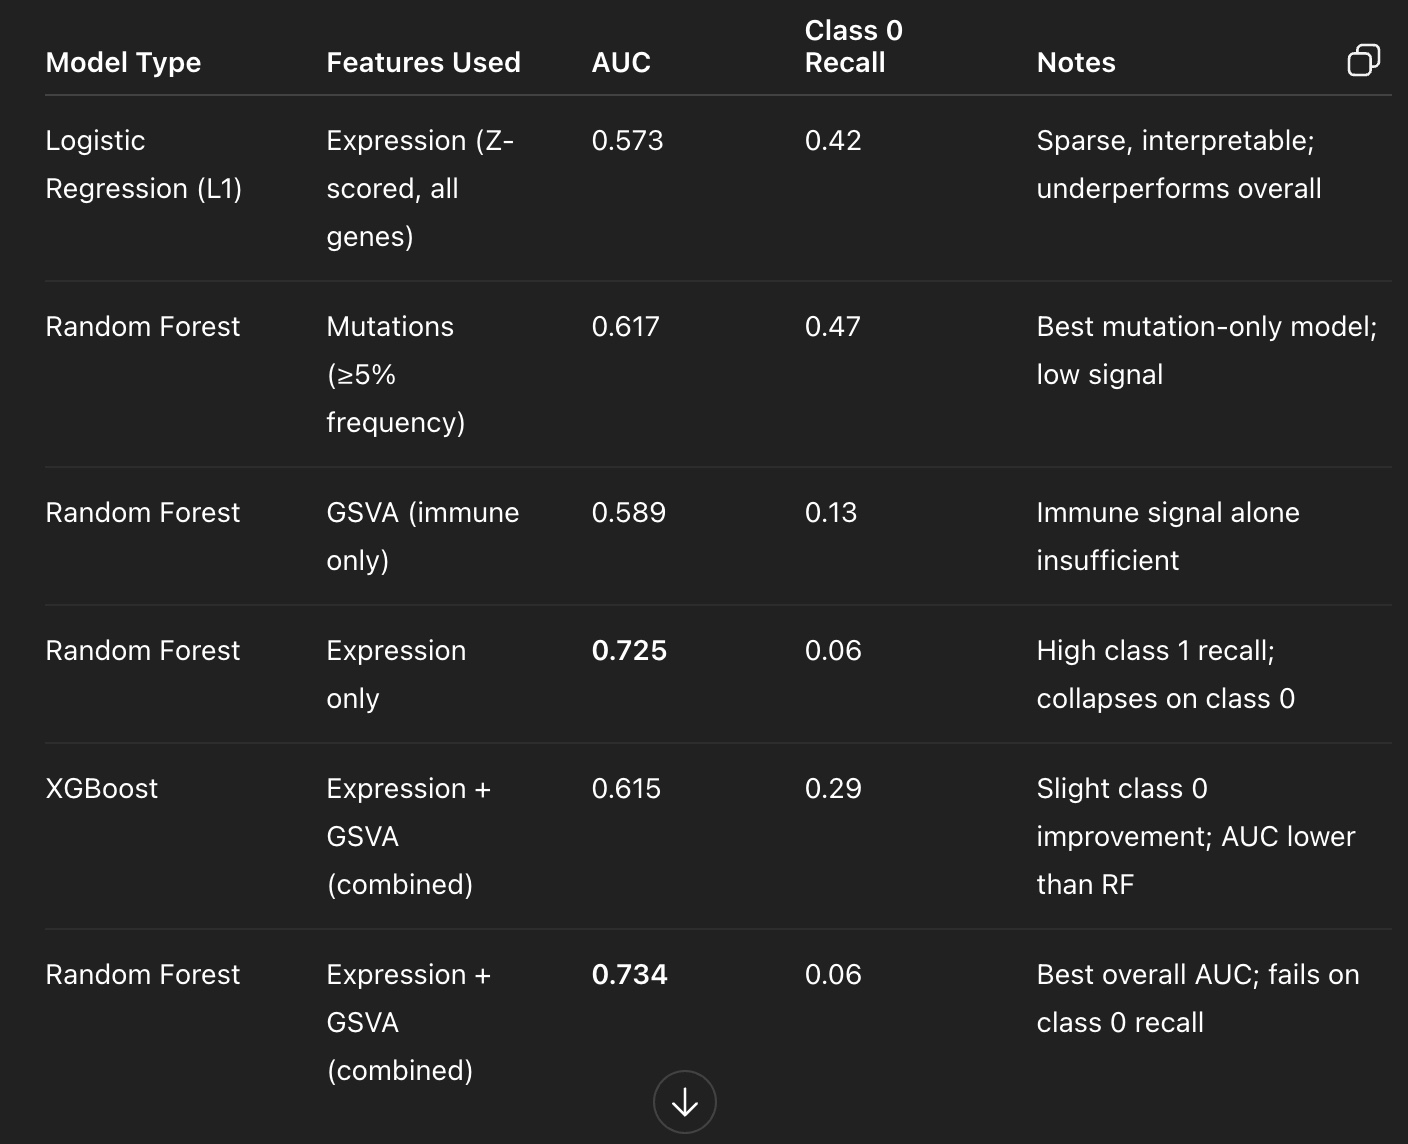

Prostate cancer response to ICI is fundamentally hard to predict from bulk mutation + RNA + pathway scores

The TCGA-PRAD dataset lacks enough biological or treatment signal to resolve responders from non-responders

This contrasts sharply with bladder cancer, where TMB + CD8 + TGF-β do separate responders

mutations dataset is samples as rows, genes as columns, 1 if mutated, 0 if not, not many mutated, VERY FEW MUTATED GENES

expressions: rows is genes, columns is patients, standardized expression(zscore) trained and used L1(AUTOMATICALLY REMOVES USELESS FEATURES BY SETTING THEIR WEIGHTS TO 0(Lasso, adds penalty to model for too many feature ))

zscore: GSVA output, column patient, row pathway name, values z score
Filtered to ~39 immune-relevant pathways (e.g., CD8, TGF-β, antigen presentation)
Trained models on GSVA alone and in combination with expression
Alone: low AUC (0.589), but improved when combined with expression

clinical: includes Primary_therapy_outcome_success(TARGET VARIABLE), 

Mutation-only	    Binary matrix of frequently mutated genes
Expression-only	    Z-scored gene expression (20k genes)
GSVA-only	        Z-scored immune signature pathways (39)
Combined model	    Expression + GSVA

We tested multiple biological data types to predict ICI response. While gene expression provided the strongest signal, GSVA features alone underperformed. Mutation data, including TMB, had limited predictive value. Ultimately, combining expression and GSVA achieved our highest AUC (~0.73), but class imbalance and signal overlap still prevented high recall on non-responders.

In this project, we evaluated the ability of various molecular and clinical data modalities to predict immunotherapy response in prostate cancer using the TCGA-PRAD cohort. We systematically tested mutation data, gene expression, immune pathway activity scores (GSVA), and combinations thereof using machine learning models including logistic regression, random forest, and XGBoost. Mutation-only models, even when filtered to frequently mutated genes, showed limited predictive power (AUC ~0.61), likely due to sparsity and weak signal in prostate tumors. Expression-based models performed better (AUC up to 0.725), though they consistently failed to recall non-responders, often collapsing into responder-only predictions. GSVA immune signatures alone performed poorly (AUC ~0.59), but when combined with expression, improved overall AUC to 0.734. However, even our best-performing models failed to reliably identify non-responders (class 0 recall <10%). Threshold tuning and class balancing provided minimal improvement. Through error analysis and feature importance evaluation, we found that many misclassified samples were associated with noisy, biologically irrelevant genes or ambiguous immune signatures. These findings suggest that bulk mutation and expression data alone are insufficient for accurately modeling ICI response in prostate cancer, in contrast to prior results in bladder cancer. This highlights the need for more precise labels, multimodal integration (e.g., spatial, single-cell, or epigenetic data), or subgroup-specific models in order to achieve clinically meaningful prediction performance in this context.